# Clustering

The dataset is taken from the source : "https://www.kaggle.com/datasets/ramisashararnidhi/mall-customer-csv"  
The dataset consists of the demographic information of 200 customers of a mall such as age, annual income, gender, spending score (ranging from 1 to 100).  
In this project, unsupervised learning such as clustering algorithms are used to segment the customers based on demographics. This customer segmentation is useful to design personalized marketing campaigns.

## Importing libraries

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN

## Data visualization

In [18]:
df = pd.read_csv("mall customers.csv")

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b> There are no missing values. <b>

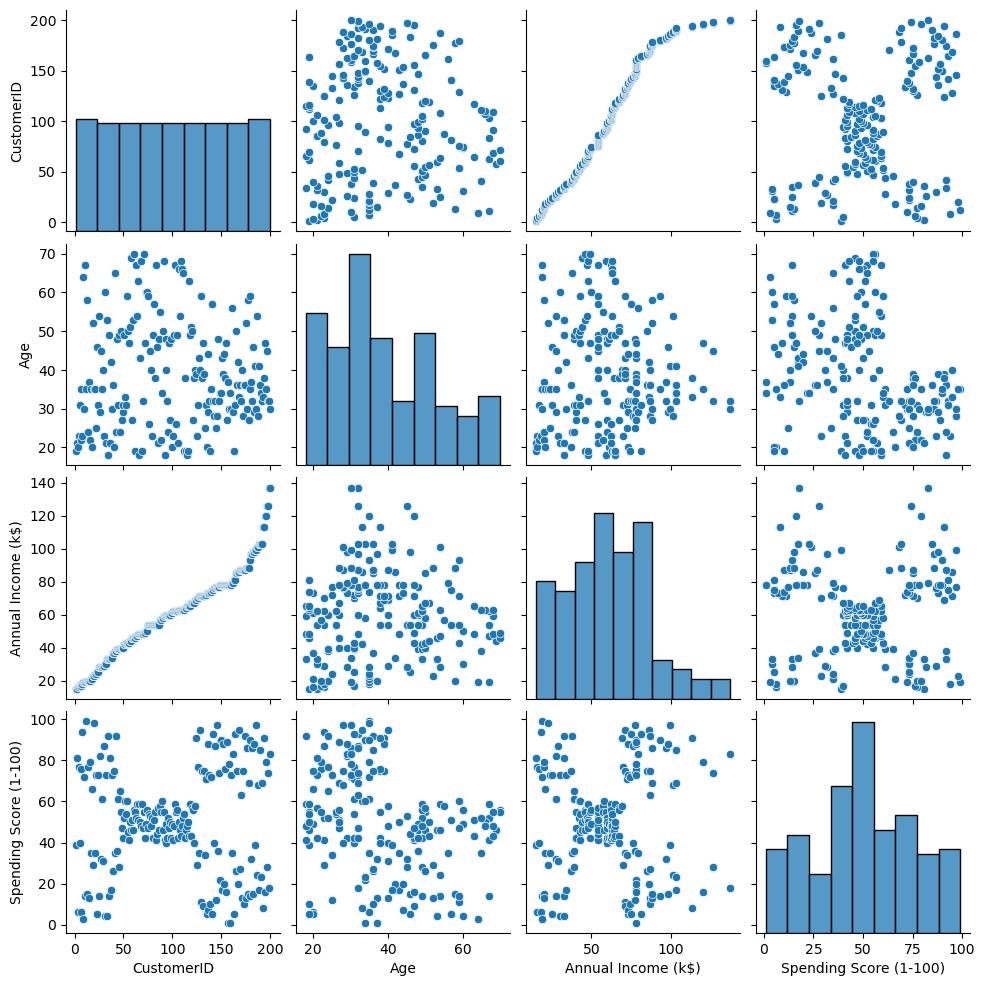

In [10]:
sns.pairplot(df)

<b> People who are less than 40 years of age seem to have high spending score.  
Annual income is not an accurate predictor of spending scores.  
Customer ID represents the unique value which is assigned to the customers and it has no significance in determing the clusters. Hence, it can be dropped. <b>

In [23]:
df = df.drop('CustomerID',axis=1)

In [25]:
X = pd.get_dummies(df,drop_first=True)

In [26]:
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


# KMeans clustering

<b> Tuning the hyperparameter, 'n_clusters' by plotting silhouette scores. <b>

For n_clusters = 2 The average silhouette_score is : 0.3141270959369709
For n_clusters = 4 The average silhouette_score is : 0.3922089237417754
For n_clusters = 6 The average silhouette_score is : 0.4520238472082079
For n_clusters = 8 The average silhouette_score is : 0.3962674538242673
For n_clusters = 10 The average silhouette_score is : 0.37202008038609263


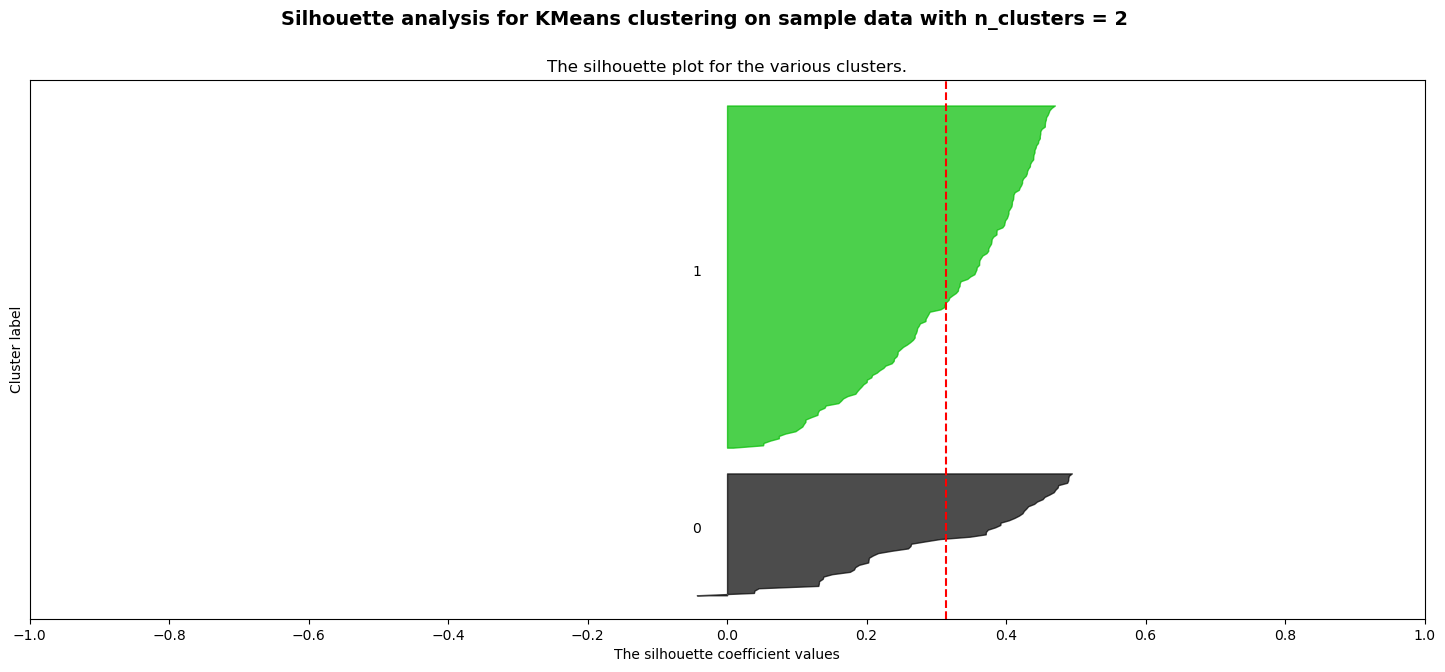

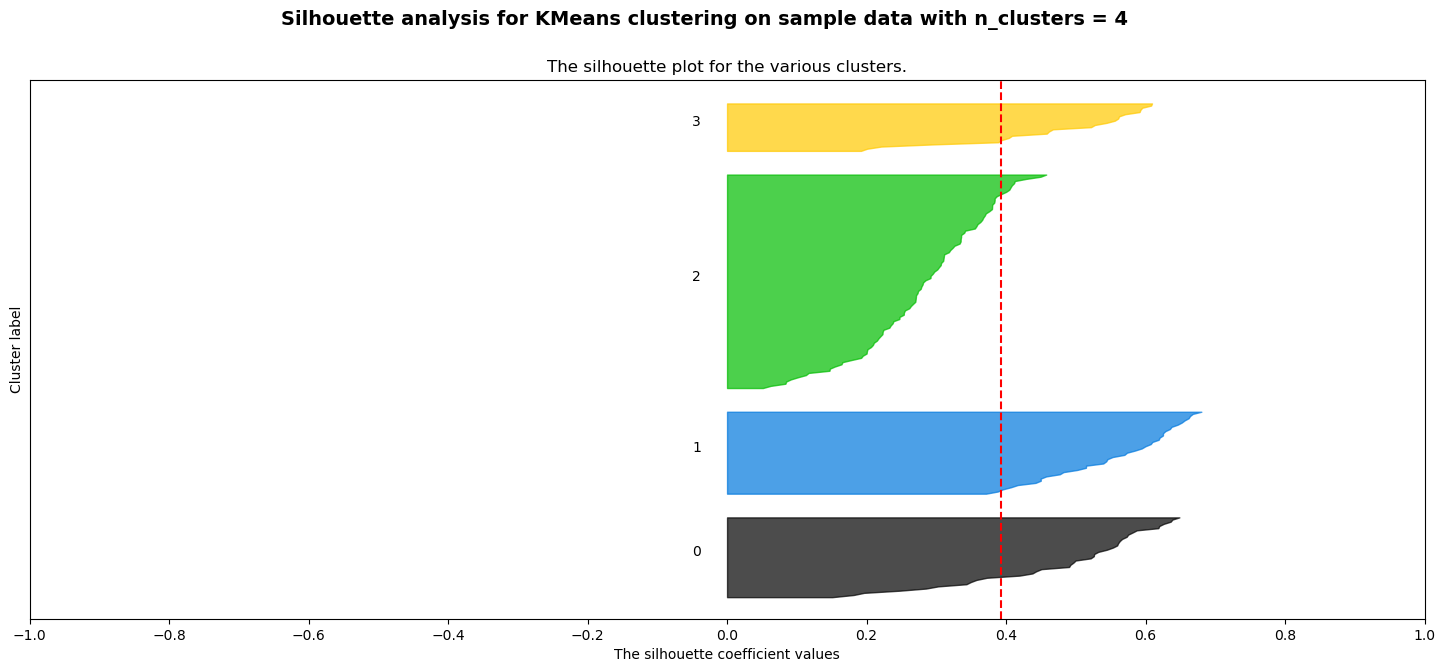

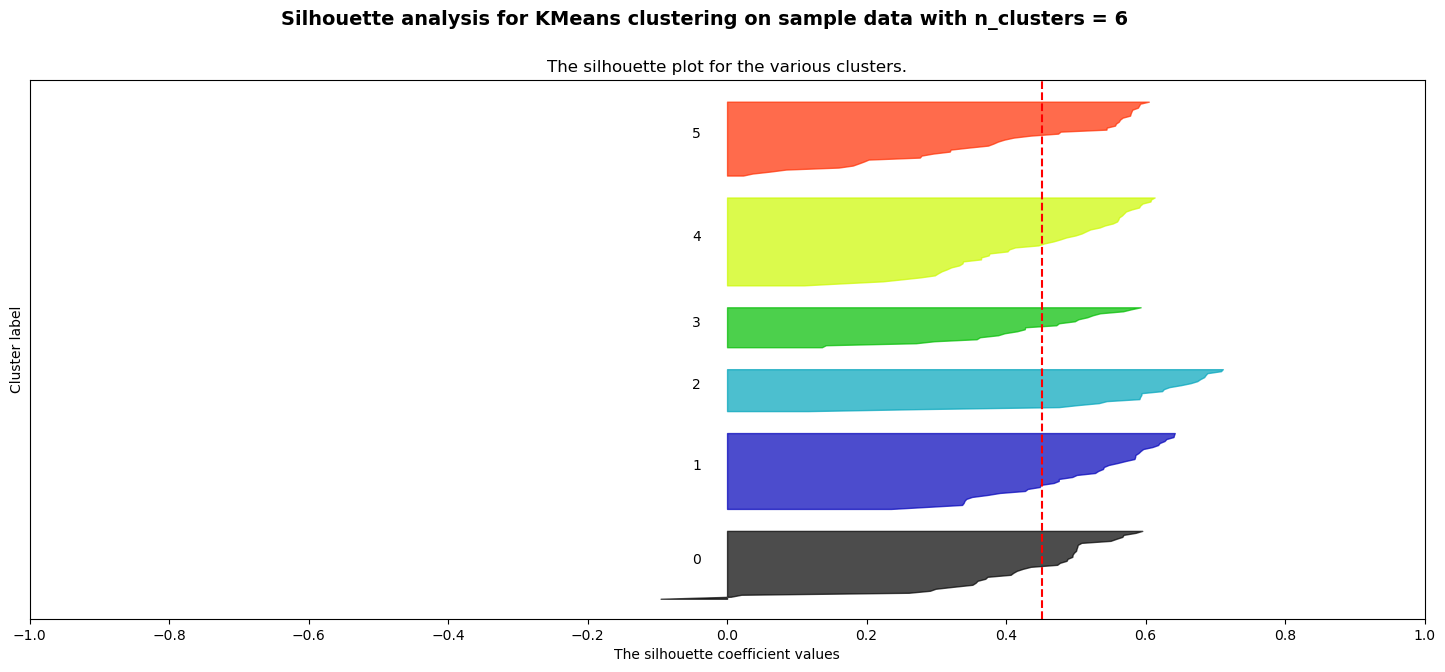

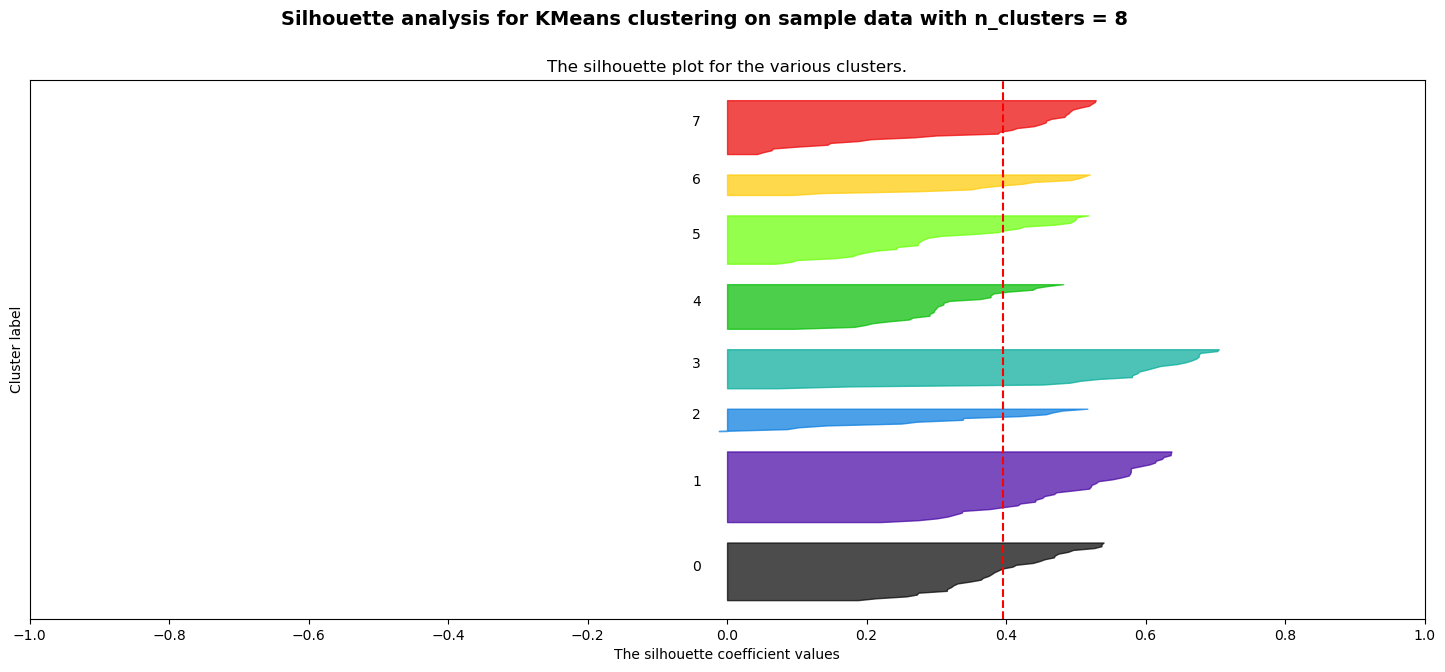

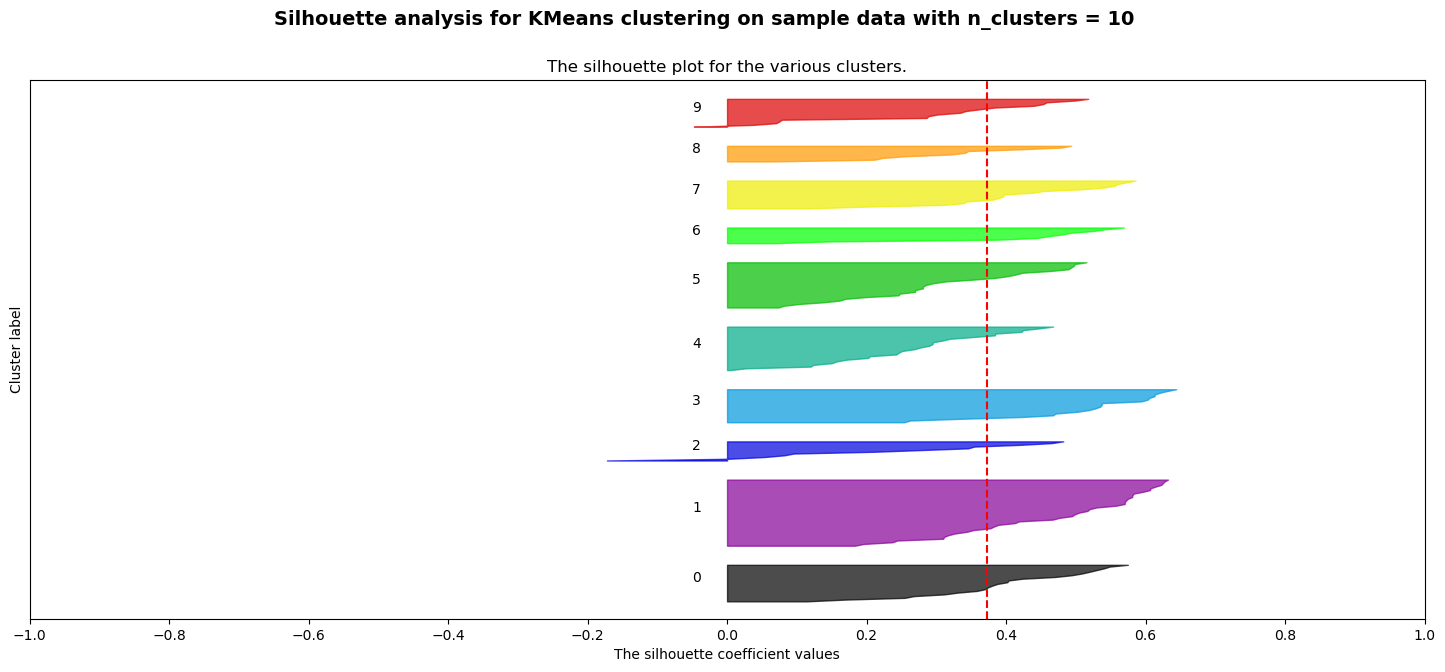

In [112]:
range_n_clusters = [2, 4, 6, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

<b> The silhouette score when n_clusters = 6, is closer to 1 in comparison to the others. Hence, the number of clusters is chosen as 6.  
When n_clusters = 2, the silhouette plot for cluster 1 is bigger in size which indicates that many clusters are fit into a single cluster. he silhouette plot for all the clusters when n_clusters=6 is similar in size. Hence n_cluster=6 is a good choice. <b>

In [41]:
model = KMeans(n_clusters=6)
cluster_labels = model.fit_predict(X)
X['cluster'] = cluster_labels

In [47]:
X.corr()['cluster'] # Correlation of the features with the cluster labels

Age                       0.455148
Annual Income (k$)       -0.307362
Spending Score (1-100)   -0.279937
Gender_Male              -0.067744
cluster                   1.000000
Name: cluster, dtype: float64

<Axes: xlabel='cluster', ylabel='Age'>

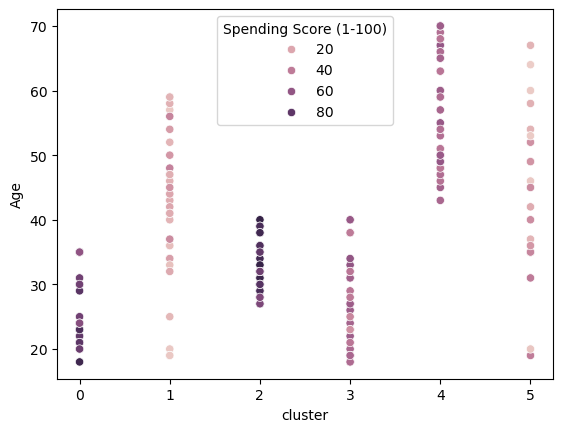

In [50]:
sns.scatterplot(data=X,hue='Spending Score (1-100)',y='Age',x='cluster')

<b> The high spenders belong to those below 40 years of age. Hence, people who belong to the clusters 0 and 2 are target during new product launches. People in cluster 3 who are young and average spenders can be targeted to increase the sales of the products as young people are more likely to turn into high spenders. <b>

In [ ]:
# Dropping the 'cluster' column before performing other clustering algorithms
X = X.drop('cluster',axis=1)

In [69]:
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


## Hierarchial clustering

<b> Tuning the hyperparameter, 'n_clusters' by plotting silhouette scores in the similar way as earlier. <b>

For n_clusters = 2 The average silhouette_score is : 0.2991780912659998
For n_clusters = 4 The average silhouette_score is : 0.41020604225027796
For n_clusters = 6 The average silhouette_score is : 0.4427682597410292
For n_clusters = 8 The average silhouette_score is : 0.42239384029802546
For n_clusters = 10 The average silhouette_score is : 0.36132675254319613


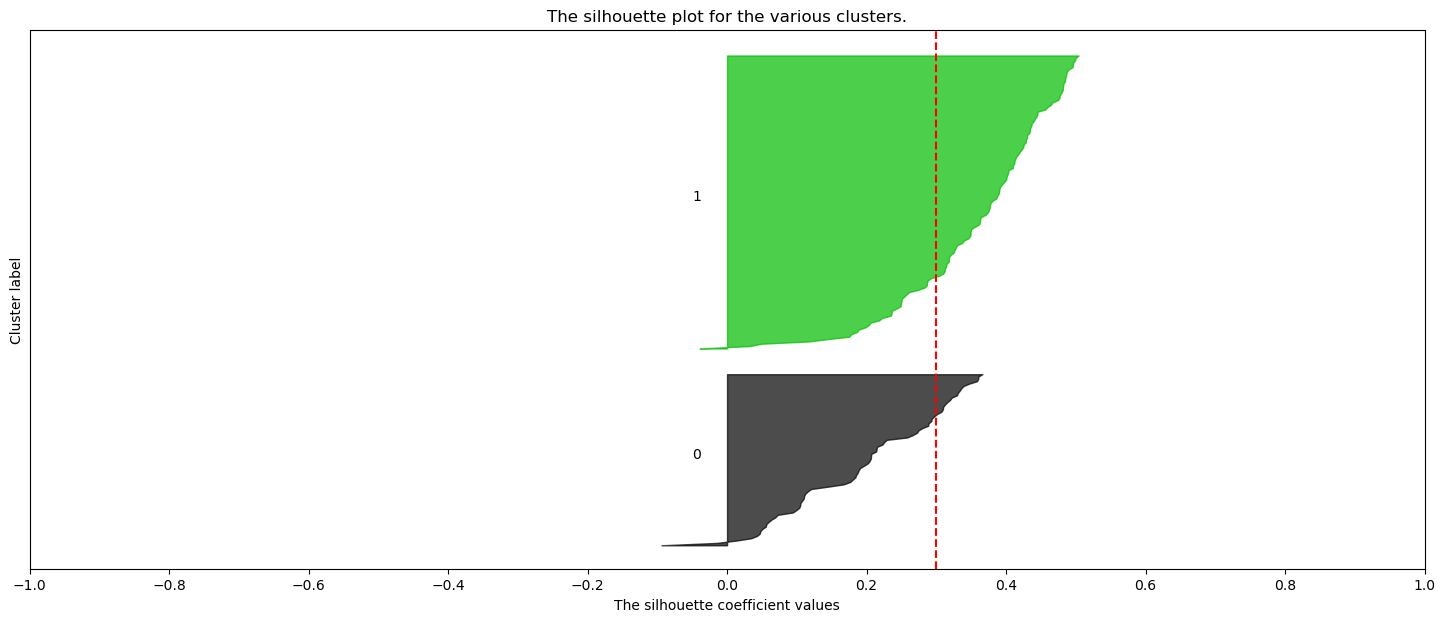

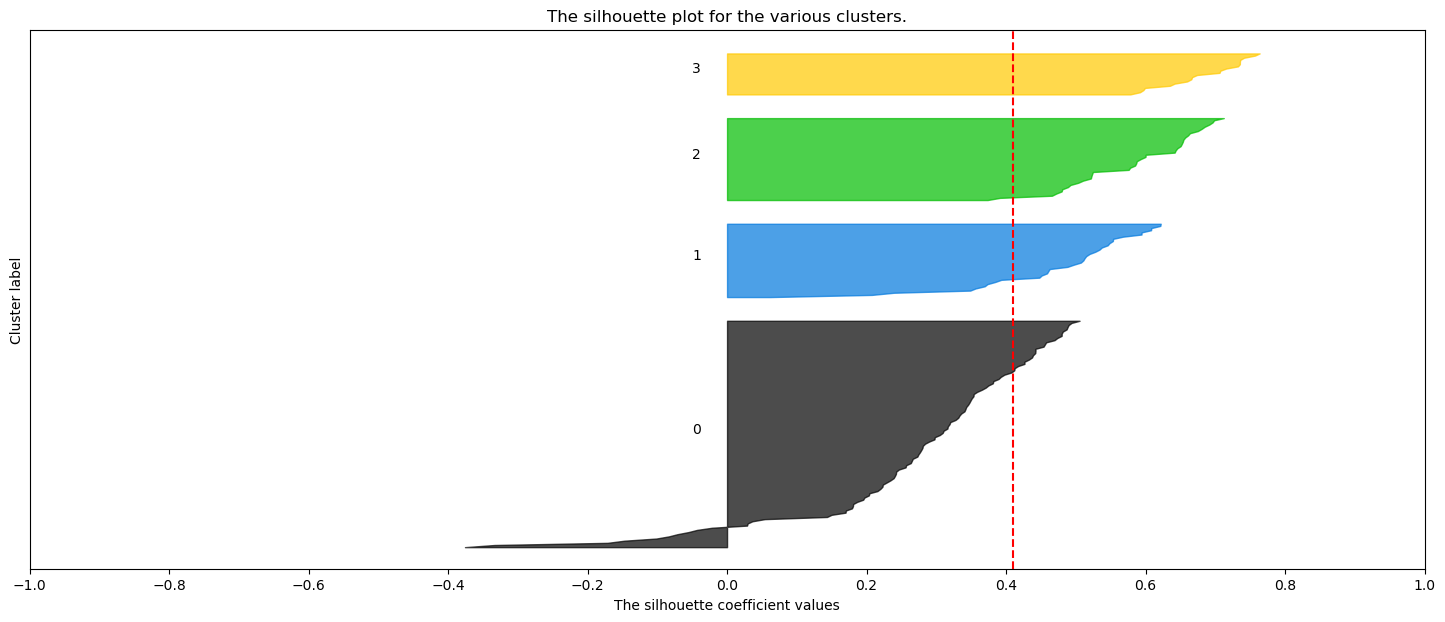

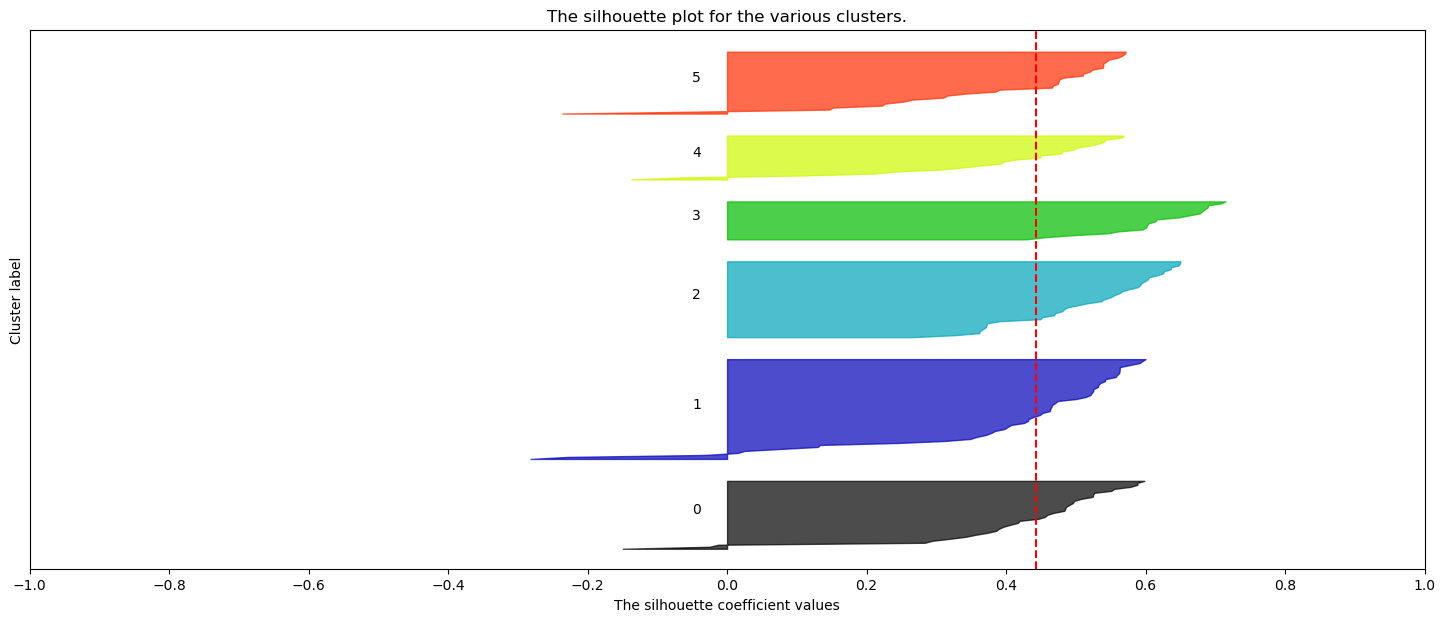

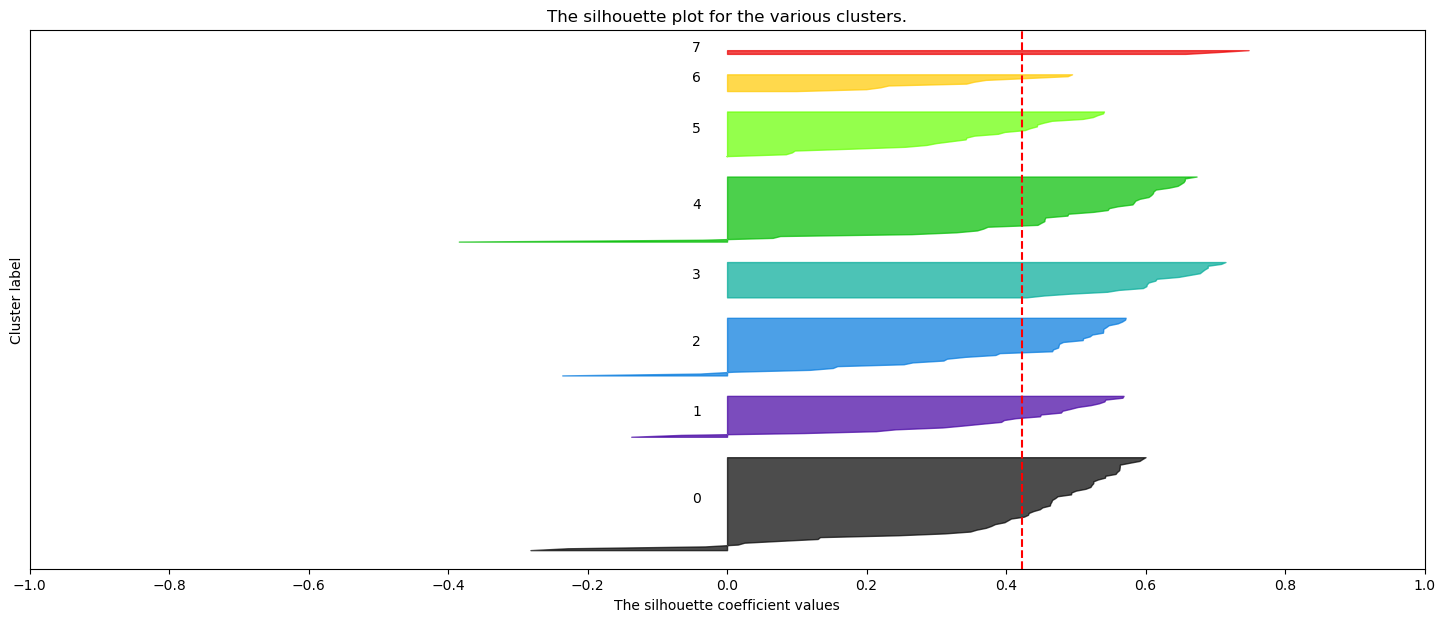

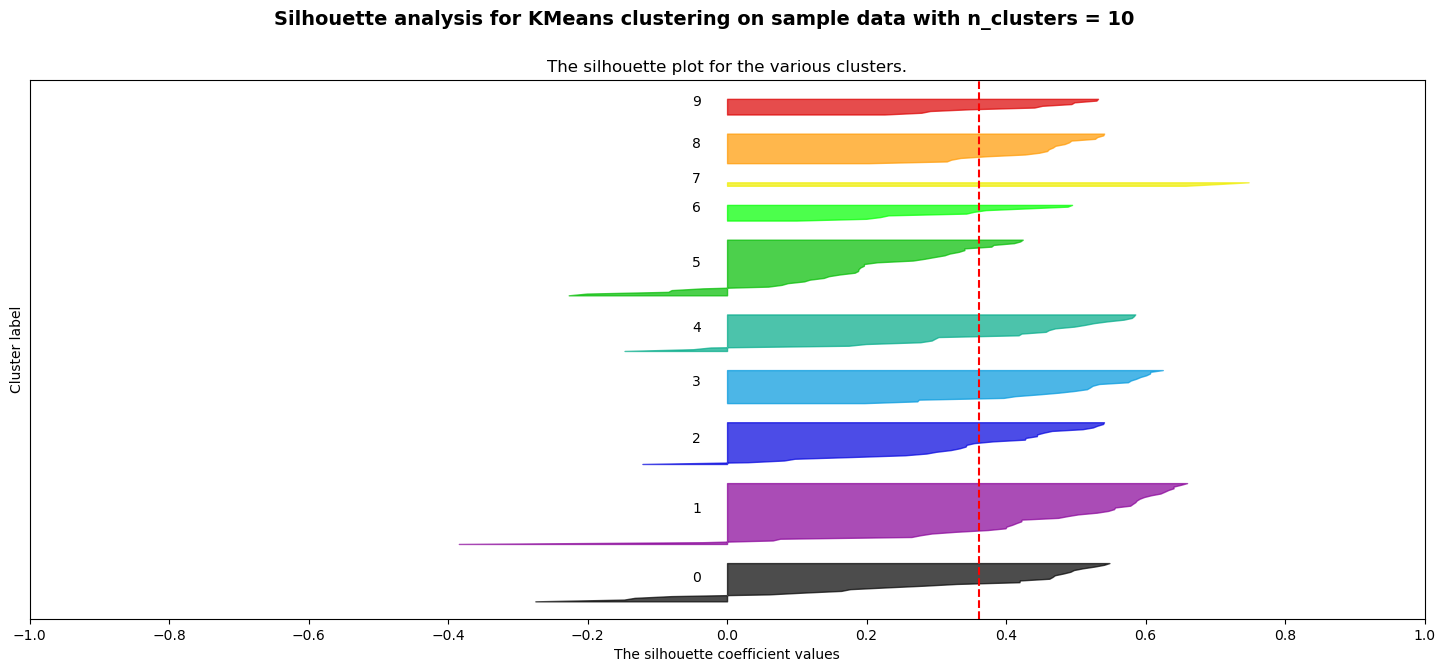

In [113]:
range_n_clusters = [2, 4, 6, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

<b> n_clusters = 6 seem to be a good choice with the silhouette score higher than other values. <b>

In [117]:
model = AgglomerativeClustering(n_clusters=6)
cluster_labels = model.fit_predict(X)
X['cluster'] = cluster_labels

In [118]:
X.corr()['cluster']

Age                      -0.482059
Annual Income (k$)       -0.509780
Spending Score (1-100)    0.183651
Gender_Male              -0.100566
cluster                   1.000000
Name: cluster, dtype: float64

<Axes: xlabel='cluster', ylabel='Age'>

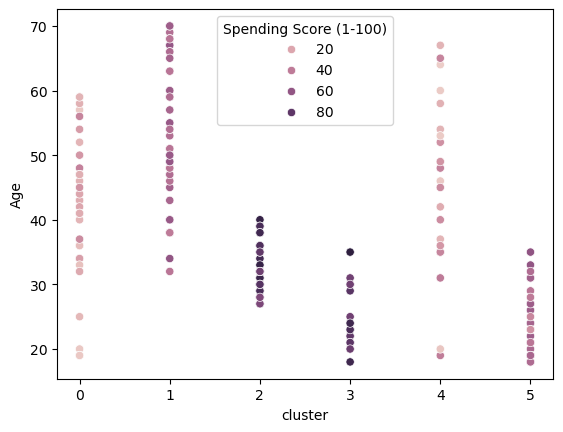

In [119]:
sns.scatterplot(data=X,hue='Spending Score (1-100)',y='Age',x='cluster')

<b> The results are similar to KMeans clustering. <b>

In [137]:
# Dropping the 'cluster' column before performing other clustering method
X = X.drop('cluster',axis=1)

## DBSCAN

<b> Tuning the hyperparameter 'epsilon'.  
An elbow plot is ploted with epsilon values ranging from 10 to 20 and the corresponding outliers are determined. Given that there are 200 data  points, around 10 outliers is good cutoff. The epsilon value of 15 is a good choice which results in optimum number of outliers as shown below. <b>

In [133]:
number_of_outliers = []

for eps in np.linspace(10,20,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit_predict(X)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

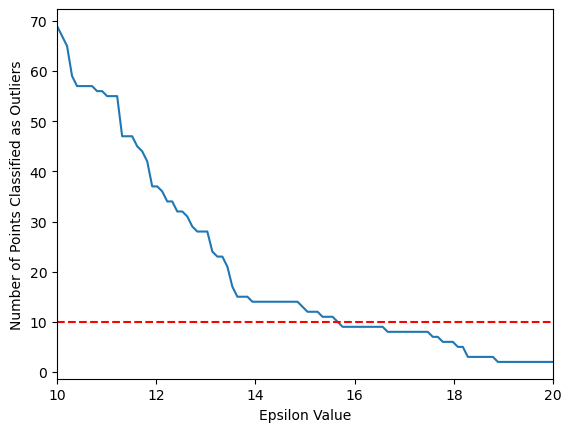

In [134]:
sns.lineplot(x=np.linspace(10,20,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(10,20)
plt.hlines(y=10,xmin=10,xmax=20,colors='red',ls='--')

In [138]:
model = DBSCAN(eps=15)
cluster_labels = model.fit_predict(X)
X['cluster'] = cluster_labels

In [139]:
X.corr()['cluster']

Age                      -0.132066
Annual Income (k$)        0.128999
Spending Score (1-100)    0.527608
Gender_Male               0.006752
cluster                   1.000000
Name: cluster, dtype: float64

<b> The correlation between the cluster labels and spending score is increased in case of DBSCAN when compared to KMeans and hierarchial clustering. Since the spending score is an important factor in analyzing market trends, DBSCAN is the most suitable model while performing customer segmentation. <b>

In [140]:
X['cluster'].unique()

array([-1,  0,  1], dtype=int64)

<b> There are only two clusters formed in this case which are 0 and 1.  
-1 represents the outliers. <b>

([<matplotlib.axis.XTick at 0x15da38372f0>,
 [Text(-1, 0, '−1'), Text(0, 0, '0'), Text(1, 0, '1')])

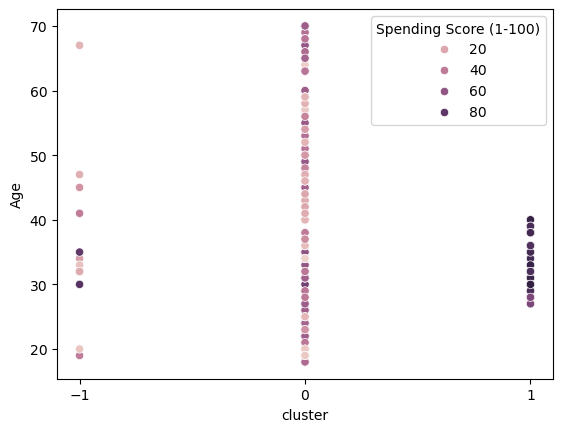

In [141]:
sns.scatterplot(data=X,hue='Spending Score (1-100)',y='Age',x='cluster')
plt.xticks([-1,0,1])

<b> High spenders are clustered as 1. This is helpful in targeting the high spenders which in turn increases the sales of the products. <b>